## Introduction

This notebook demonstrates how Ollama's Llama 3.1:8b model can summarize key details from PDF files.

## Installation

<p align="justify">
Executes the ollama_install.sh script to install Ollama on your machine. It also installs the Python packages PyPDF2 and fpdf. To use pdf2image, you will need to install poppler-utils in your environment as well.
</p>

In [1]:
!chmod +x /content/ollama_install.sh
!/content/ollama_install.sh
!sudo apt-get install -y poppler-utils
!pip install PyPDF2 fpdf pdf2image

Installing Ollama on your environment
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (119 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (N

## Run Ollama Service

To run the Ollama service in the background,  this method down below allows the Ollama service to stay active while the main program continues executing other tasks.

In [2]:
%run '/content/ollama_thread.py'

## Downloading Ollama's Llama 3.1:8b Model

The command down below downloads the Llama 3.1:8b model from Ollama's repository to our Jupyter Notebook's environment.

In [3]:
!ollama pull llama3.1:8b

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    

## Downloading LangChain Ollama

Installs LangChain Ollama's integration package, which allows us to use Ollama models within the LangChain framework.

In [4]:
!pip install langchain-ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0


## Imports
Imports for our notebook.

In [5]:
import ollama
from IPython.display import display, Markdown
from fpdf import FPDF
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

## PDF Object

In order to create a PDF of anything we need to create a class PDF class where we can create PDFs with headers, footers, and content.

In [6]:
class PDF(FPDF):
    def __init__(self, title, header_text, footer_text):
        super().__init__()
        self.title = title
        self.header_text = header_text
        self.footer_text = footer_text

    def header(self):
        # Add a title to the header
        self.set_font("Arial", 'B', 14)
        self.cell(0, 10, self.header_text, 0, 1, 'C')

    def footer(self):
        # Add a footer with page number
        self.set_y(-15)
        self.set_font("Arial", 'I', 14)
        self.cell(0, 10, f'{self.footer_text} - Page {self.page_no()}', 0, 0, 'C')

    def add_content(self, content):
        # Add the main content to the PDF
        self.set_font("Arial", size=12)
        self.multi_cell(0, 10, content)

## Creating an Example PDF
We will now generate a PDF document using our PDF class.

In [7]:
python_pdf_example = PDF(title="History of Python", header_text="Python History", footer_text="Generated by PDF Generator")
python_pdf_example.add_page()
content = (
    "Python is a dynamic and versatile programming language that has significantly shaped the software development world since its inception. "
    "The language was created by Guido van Rossum in December 1989, with the first official release of Python 0.9.0 in February 1991. It was initially developed as a successor to the ABC programming language, "
    "which van Rossum had worked on at Centrum Wiskunde & Informatica (CWI) in the Netherlands. ABC itself was designed to be simple, easy to use, and intended for non-programmers, yet it had limitations that Python sought to overcome. "
    "The primary motivation behind Python's creation was to develop a language that combined readability, simplicity, and flexibility. Python's syntax, characterized by its clean and readable structure, quickly set it apart from other programming languages. "
    "For instance, it places a strong emphasis on indentation rather than brackets or braces, making code visually clear and intuitive. The initial Python 0.9.0 release included several essential features that would define the language, such as exception handling, functions, and core data types like strings, lists, and dictionaries. "
    "Python's journey continued with the release of Python 1.0 in January 1994. This version marked the first official stable release and solidified Python’s reputation as a powerful, general-purpose language. It introduced key features like the standard library, which became a hallmark of Python’s power, allowing developers to achieve a lot with minimal effort. "
    "The language was gaining traction in the developer community, particularly due to its philosophy of making code both easy to write and easy to read, which had a strong appeal to both experienced programmers and those new to the world of software development. "
    "In the year 2000, Python reached a major milestone with the release of Python 2.0. This version introduced several groundbreaking features, most notably list comprehensions, which allowed for a more functional approach to writing loops and data processing. Another significant addition was the introduction of a garbage collection system, which automated memory management and helped prevent common issues like memory leaks. "
    "Python 2.0 established Python as a more mature language, suitable for both small scripts and large-scale software projects. However, despite Python’s success, it also faced a significant challenge: backward compatibility. With the release of Python 3.0 in 2008, Python made a bold, but controversial, move by breaking backward compatibility with Python 2.x. The decision was made to address design flaws in the language and introduce improvements that would make Python more robust and future-proof. For example, Python 3.x introduced better Unicode support, improved standard libraries, and a more consistent syntax. "
    "The removal of certain legacy features—such as the old-style print statements and division behavior—was met with resistance initially, but it ultimately set the foundation for Python’s continued evolution. Throughout the 2000s and into the 2010s, Python continued to grow rapidly in popularity. The language’s open-source nature and supportive community played a crucial role in this expansion. Python's growth was not just limited to its technical improvements, but also its ecosystem. By this time, Python had become a language of choice for diverse fields like web development, scientific computing, and artificial intelligence (AI). Libraries like Django and Flask made Python a go-to language for web development, while NumPy, SciPy, and Pandas solidified its place in data science. "
    "In recent years, Python's popularity in AI and machine learning has exploded, thanks in part to libraries like TensorFlow, Keras, and PyTorch. The key to Python’s widespread adoption is not just its powerful features, but also its community-driven development. Python has benefited from a growing ecosystem of open-source tools, frameworks, and libraries, which have further enhanced its versatility. Python's large, active community of developers has also ensured the language remains up-to-date with modern computing needs. The Python Software Foundation (PSF) supports this community, ensuring that Python remains free, open, and available to all. "
    "In conclusion, Python’s history is one of continuous evolution and adaptation. From its humble beginnings as a successor to the ABC language, Python has grown into one of the most widely-used programming languages in the world. It has maintained its core principles of readability, simplicity, and flexibility, and as a result, it remains one of the most popular languages among developers of all skill levels. Python’s role in fields like web development, data science, and AI demonstrates its versatility, and its ongoing improvements ensure that it will continue to play a major role in the development of modern software for many years to come."
)
content = content.encode('latin-1', 'replace').decode('latin-1')
python_pdf_example.add_content(content)
python_pdf_example.output("python_history.pdf")

''

## Visualizing our PDF

Below we utilize pdf2image and matplotlib to visualize our given PDF.


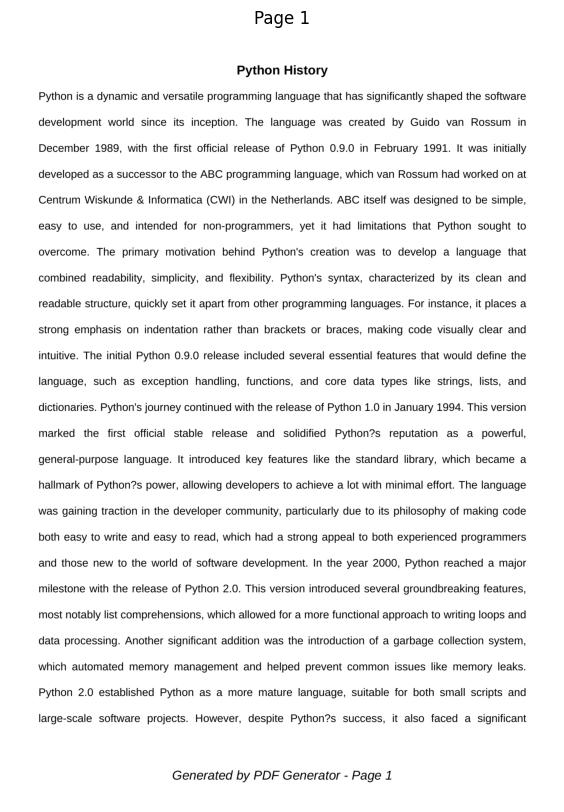

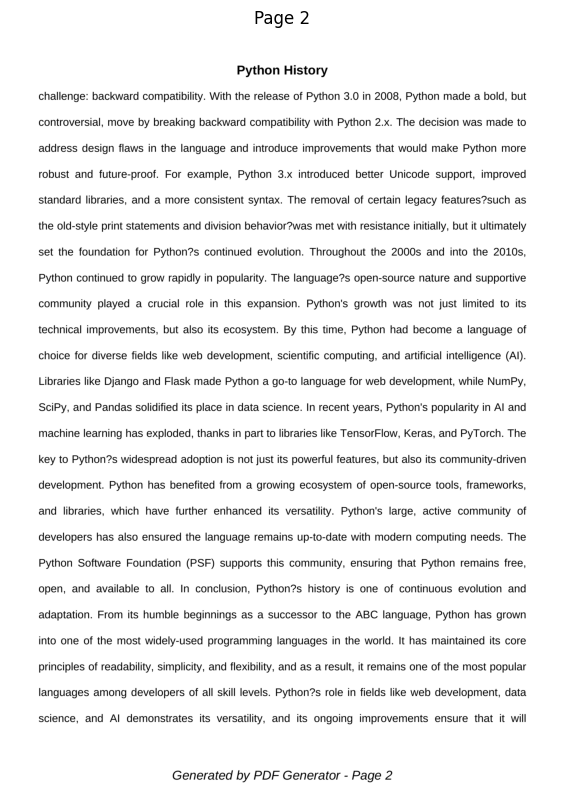

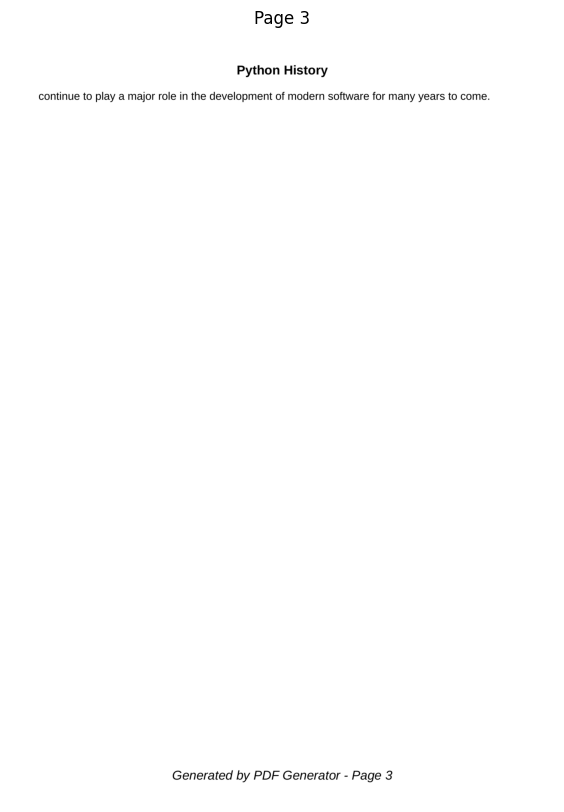

In [8]:
def visualize_pdf(pdf_path):
    # Convert PDF to a list of images (one image per page).
    images = convert_from_path(pdf_path)

    # Create a figure for visualization.
    for i, image in enumerate(images):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')  # Remove axes for better visualization.
        plt.title(f'Page {i + 1}')
        plt.show()

pdf_path = "/content/python_history.pdf"
visualize_pdf(pdf_path)

## Using Ollama's Llama 3.1:8b Model To Analyze Our Example PDF

Below is a method that allows Ollama's Llama 3.1:8b model to process and analyze our example PDF's content.

In [11]:
def process_pdf(file_path, model='llama3.1:8b'):
    # Read PDF and extract text
    reader = PdfReader(file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() + "\n"

    # Prepare message for Ollama
    messages = [
        {
            'role': 'user',
            'content': f'Analyze and summarize the following text from a PDF:\n\n{text}'
        }
    ]

    # Process with Ollama
    response = ollama.chat(model=model, messages=messages)
    return response['message']['content']

## Ollama Processing Our Document Example Usage


In [12]:
display(Markdown(process_pdf('/content/python_history.pdf')))

Here is a summary and analysis of the text:

**Summary:**

The text provides an overview of Python's history, from its creation by Guido van Rossum in 1989 to its current status as one of the most widely-used programming languages. The language was designed to be simple, easy to use, and flexible, with a focus on readability and simplicity. Over the years, Python has undergone significant improvements, including the introduction of new features, such as list comprehensions and garbage collection, and the removal of legacy features to ensure backward compatibility. Today, Python is used in various fields, including web development, data science, artificial intelligence (AI), and machine learning.

**Analysis:**

The text provides a clear and concise history of Python's evolution, highlighting its key milestones and innovations. The author emphasizes the importance of Python's community-driven development, which has contributed to its widespread adoption. The text also notes that Python's success is due in part to its open-source nature and supportive ecosystem.

Some notable points from the text include:

* Python was created as a successor to the ABC language, but aimed to overcome its limitations.
* The language's syntax, with a strong emphasis on indentation, sets it apart from other programming languages.
* Python 2.0 introduced significant features, including list comprehensions and garbage collection.
* The release of Python 3.0 in 2008 marked a major change, breaking backward compatibility to address design flaws and introduce improvements.
* Today, Python is widely used in various fields, with a strong focus on web development, data science, AI, and machine learning.

The text provides a neutral tone, presenting Python's history as a story of continuous evolution and improvement. The author highlights the language's strengths, including its readability, simplicity, and flexibility, while also acknowledging challenges and controversies, such as the removal of legacy features to ensure backward compatibility. Overall, the text provides a comprehensive and engaging overview of Python's history and significance in the programming world.